## Problem 1: Representation and properties of networks

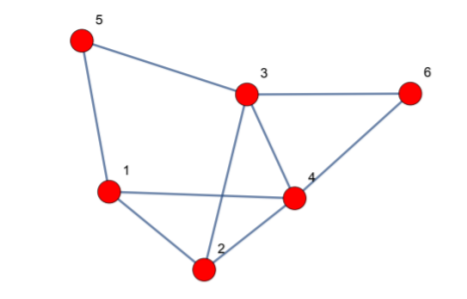

1. Represent the network using (a) an adjacency matrix, and (b) an adjacency list.
2. Determine the degree of each node.
3. Classify the following walks as a trail, path, cycle, or other. Explain your reasoning.  
    a. 6 → 3 → 2 → 4 → 2 → 1  
    b. 1 → 4 → 6 → 3 → 2  
    c. 5 → 1 → 2 → 3 → 5  
4. Identify all fully connected three-node subgraphs (triangles).




ANSWERS:  

1. Adjacency  
    a. Matrix:  
> $\begin{bmatrix}0&1&0&1&1&0\\1&0&1&1&0&0\\0&1&0&1&1&1\\1&1&1&0&0&1\\1&0&1&0&0&0\\0&0&1&1&0&0\end{bmatrix}$  

    b. List:  
> $[ [ 1: 2, 4, 5, / ],  \\
[ 2: 1, 3, 4, / ],  \\
[ 3: 2, 4, 5, 6, / ],  \\
[ 4: 1, 2, 3, 6, / ],  \\
[ 5: 1, 3, / ],  \\
[ 6: 3, 4, / ] ]$


2. Degree:  
> $d(1) = 3  \\
d(2) = 3  \\
d(3) = 4  \\
d(4) = 4  \\
d(5) = 2  \\
d(6) = 2$


3. Classification of paths:  
    a. $6 → 3 → 2 → 4 → 2 → 1$
> Can only be classified as a walk, since the $(2,4)$ edge is repeated, which means node $2$ is also repeated.  

    b. $1 → 4 → 6 → 3 → 2$
> Can be classified as a trail since no edge is repeated, and it can also be more specifically classified as a path since there is also no repeated vertex, and it is an open walk due to the fact that it does not end on the same node it started.  

    c. $5 → 1 → 2 → 3 → 5$
> Can be classified as a cycle, which can be thought of as a closed path since there are no repetitions of verteces nor of edges along the walk, with the exception of repeating the first vertex at the end, in order to close the walk.


4. All fully-connected 3-node subgraphs:  
> $G_1 = \{1,2,4\}  \\
G_2 = \{2,3,4\} \\
G_3 = \{3,4,6\}$  


---

## Problem 2: Modified Barabási-Albert

Implement the following modified Barabási-Albert random graph algorithm. The rules of the
Barabási-Albert algorithm still apply except that there is a 50% chance the new node at each
iteration is added using the preferential attachment method, and a 50% chance the new node is
attached to a uniformly randomly selected node. You may (but don’t have to) use Code 16.12 from
Sayama which implements the Barabási-Albert algorithm.  

Experiment with different settings of the parameters, make plots of the resulting degree
distributions, and compare your results to the expected behavior of the original Barabási-Albert
algorithm. (You do not need to implement or experiment with the original algorithm, but you can if
you want to. If you don’t implement it, be sure to explain what the expected behavior of the original
algorithm is with respect to the degree distribution.)


anim_140609162365920


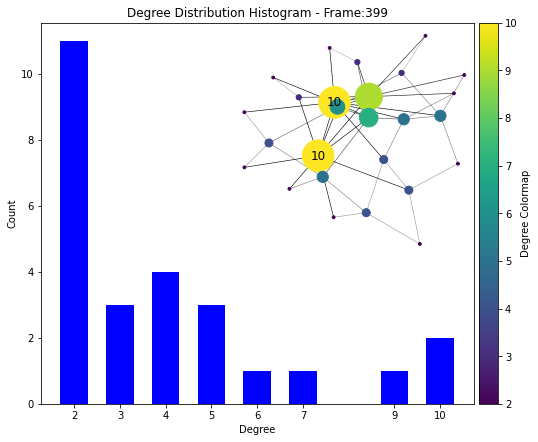

In [7]:
from pylab import uniform
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import collections
# from mpl_toolkits.axes_grid1 import make_axes_locatable


m0 = 5 # number of nodes in initial condition
m = 2 # number of edges per new node

g = nx.complete_graph(m0)
g.pos = nx.spring_layout(g)
g.count = 0


def get_min_max_degree(g):
    deg_list = [g.degree[i] for i in list(g.nodes)] 
    return min(deg_list), max(deg_list)


fig, ax = plt.subplots(figsize=(8,6))
plt.tight_layout(1.5)

norm = plt.Normalize(*get_min_max_degree(g))
sm = plt.cm.ScalarMappable(norm=norm)
FPS = 20
ITERS = 400


def pref_select_mod(g, nds):
    """
    Modified preferential selection only applies with p=0.5
    """
    if uniform() < 0.5:
        return nds[int(uniform(0,len(nds)))]
    else:
        r = uniform(0, sum(g.degree(i) for i in nds))
        x=0
        for i in nds:
            x += g.degree[i]
            if r <= x:
                return i

def update(n, g):
    if g.count % FPS == 0: # network growth once in every FPS steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        
        for i in range(m):
            j = pref_select_mod(g, nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)
    g.count += 1
    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    # use node degrees to make cmaps for nodes and edges
    d_list = [g.degree[i] for i in list(g.nodes)]
    degree_sequence = sorted(d_list, reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    # update the colorbar range, node colors, edge aplhas, and highest-degree label
    max_d = max(d_list)
    sizes = [i**3 for i in d_list]
    n_lab = {n:(d if d==max_d else '') for n,d in g.degree()}
    e_list = []
    for e in list(g.edges):
        mx_deg = max(g.degree(e[0]), g.degree(e[1]))
        e_list.append((0,0,0,mx_deg/max_d))   
    sm.set_clim(vmin=min(d_list), vmax=max(d_list))

    plt.axes(label='hist') # <---
    plt.axis('off')
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(deg)

    plt.axes(label='test', sharex=ax) # <---
    plt.title(label=f"Degree Distribution Histogram - Frame:{n}")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    bar = plt.bar(deg, cnt, width=0.6, color="b") 
    plt.colorbar(sm, label='Degree Colormap', pad=0.01)

    plt.axes([0.4, 0.42, 0.42, 0.53],label='graph') # <---
    plt.axis("off")
    nodes = nx.draw_networkx_nodes(g,pos=g.pos, node_size=sizes, node_color=d_list, label=n_lab)
    edges = nx.draw_networkx_edges(g,pos=g.pos, width=0.6, edge_color=e_list)
    nx.draw_networkx_labels(g, pos=g.pos, labels=n_lab)
    
    return fig,

print('processing animation...',end='')
anim = FuncAnimation(fig, update, frames=ITERS, interval=1000//FPS, blit=True, fargs=([g]))

anim.save(f'hist_anim_final.gif', fps=FPS, writer='pillow')
# anim.save(f'anim_awesome.mp4', fps=FPS, extra_args=['-vcodec', 'libx264'])
print(f'\ranim_{id(g)}')
plt.show()
fig.savefig(f'hist_final.png', writer='pillow')

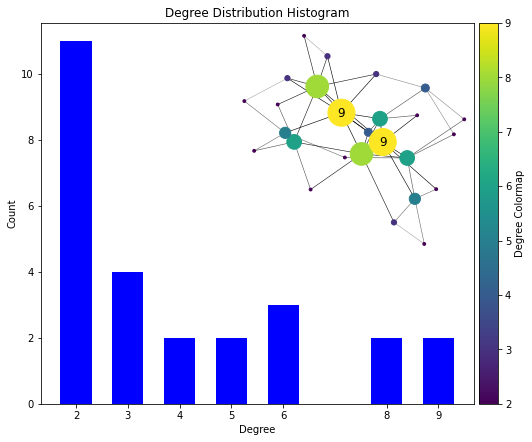

In [96]:
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(8,6))
plt.tight_layout(1.5)

plt.bar(deg, cnt, width=0.6, color="b")

plt.title("Degree Distribution Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

norm = plt.Normalize(*get_min_max_degree(g))
sm = plt.cm.ScalarMappable(norm=norm)
plt.colorbar(sm, label='Degree Colormap', pad=0.01)

# draw graph in inset
plt.axes([0.4, 0.42, 0.42, 0.53])
plt.axis("off")

d_list = []
d_list = [g.degree[i] for i in list(g.nodes)]
max_d = max(d_list)
sizes = [i**3 for i in d_list]
n_lab = {n:(d if d==max_d else '') for n,d in g.degree()}
e_list = []
for e in list(g.edges):
    mx_deg = max(g.degree(e[0]), g.degree(e[1]))
    e_list.append((0,0,0,mx_deg/max_d))

nodes = nx.draw_networkx_nodes(g,pos=g.pos, node_size=sizes, node_color=d_list, label=n_lab)
edges = nx.draw_networkx_edges(g,pos=g.pos, width=0.6, edge_color=e_list)
nx.draw_networkx_labels(g, pos=g.pos, labels=n_lab)


plt.show()

fig.savefig('degDist.png', writer='pillow')

ANSWER:  

> The main difference we observe with the modified Barabasi-Albert simulation, is that the power-law of degree destribution is lost somewhat. In the classic scenario, the degree distribution of the network after increasing numbers of iterations falls into a power-law distribution with the lower end starting at the number of edges added to each newcomer node (`m` in the code above), which is a result of the preferential attachment mechanism for newcomer nodes, which establishes the likelihood of a new node connecting to existing ones based on the degree of each existing node; higher degree means higher likelihood of being chosen for attachment to newcomers. The modification adds a $50%$ random chance of this mechanism _not_ being applied to newcomer nodes, and instead assigns uniformly distributed random nodes as the newcomer's connections. Over increasingly large numbers of iterations, this makes the degree distribution of the network deviate from the original scenario, displaying a more dampened power-law.

*_Animations showing the evolution over time-steps of the degree distribution for the modified attachment Barabasi-Albert network can be found in the attached zip file._

---

## Problem 3: Network metrics

For each of the metrics below, determine which network has the largest
1. diameter
2. density
3. average clustering coefficient

You do not need to compute these metrics but should motivate why you think a particular network
has the largest metric of each type.

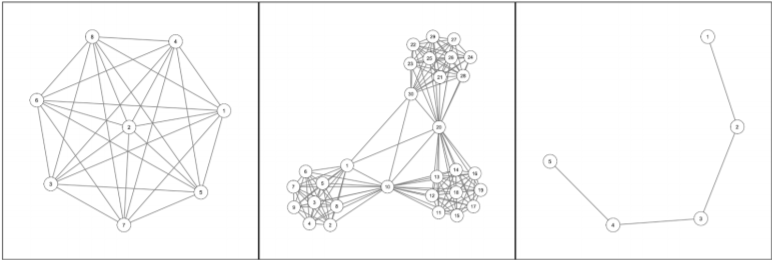

ANSWERS:  

1. Largest diameter: the right-most network.
2. Highest density: the left-most network, since it is a complete graph.
3. Largest average clustering coefficient: the left-most network and the 



---

## Problem 4: Silly PageRank

Since Google is such a popular search engine, various people and companies spend a lot of time
coming up with strategies for gaming the PageRank algorithm. If you could find a way to get your
website near the top search result for a particular search phrase, you could get a lot more traffic to
your site.  

Suppose that instead of proper PageRank, Google used the metric Silly PageRank, which simply counts the number of incoming edges to a node as its rank value. Explain why this would be a bad metric for use in a search engine.  

With reference to the #strategize HC and from Google’s perspective, explain how you should position yourself to simultaneously

*   provide the most relevant search results to your users,  
*   allow legitimately relevant sites to have a high search ranking, and  
*   prevent sites from gaming the system – that is, from getting a high rank when they don’t deserve it.


ANSWERS:

- Why Silly PageRank is a bad metric for use in a search engine:  

> Setting a site's rank based solely on the number of incoming edges to it allows for extremely simple ways to abuse the ranking system. Sites seeking to game the system and get a higher rank could very simply just have huge number self-referring hyperlinks, thus increasing the amount of incoming edges, or (if our PageRank were not THAT silly) then the owner of one site could just as easily create several other sites and have them all point to each other, and in doing so making sure all of their sites have a rank of $r=n-1$, where $n$ is the number of sites the same person owns. This ranking strategy would also lead to issues where legitimate sites (which would be arguably less likely to try and 'game' the system) would in fact be significantly underrepresented, because they would not have as many fake inward edges.

- How to #strategize Google's positioning:  

> The first thing to do is to establish a diagnosis of the situation Google faces. They face the challenge of ranking websites based on legitimate relevance to search queries. A simplified characterization of key agents in the system where this problem exists can be achieved by specifying three main roles: _users_ who make use of Google's search engine; clients who host the _sites_ that Google is trying to rank, which can be further subcategorized as _legitimate_ or _ilegitimate sites_, distinguished by whether or not the client hosting the site would try to cheat and get an undeserved rank; and finally Google's _developers_ who actually design and implement the search engine's ranking algorithm. A similar simplification of the strengths and weaknesses of each agent can be made: _users_ are in this case stakeholders with no influence on the rank of sites (aside from the fact in reality they could also be clients if they host a website), _clients_ have the ability to link to other sites from within their own, and they also have the ability to host more than just one site, giving them the power to influence the flow of links between sites they own, and finally _developers_ have the ability to establish the 'decisions' that the ranking algorithm makes in any given scenario, although they are constrained by the fact that it is _clients_ who establish linkage through their _sites_.  

> Having established this diagnosis, we can develop a guiding principle that would help Google establish a set of actions to achieve their goals. Based on the diagnosis, this guiding principle could be described as follows: "Google's search engine should **rank** their clients' _sites_, assigning _legitimate sites_ their appropriate _relevance_, while preventing _ilegitimate sites_ from leveraging the weaknesses of the algorithm to cheat the system and receive undesereved ranks."  

> A plan of action can then be established in a variety of ways, and the implementation-level decisions would be more-or-less arbitrary. One characterization of an appropriate set of actions that directly leverages the _developers'_ strengths in the system to prevent _ilegitimate sites_ from harnessing their partial control over the linkage system in their favor and cheat the algorithm, is what Google actually does in real life by choosing to implement a "flow" based rank for pages, where the rank of any one site is determined by their in-degree, as well as the rank of the sites that link to it, which is distributed over the out-degree of each other site which links to it. This strategy makes it so legitimacy is preserved in the ranking strategy. Furthermore, Google's use of "Teleports" (random jumps between points in the network) helps protect the algorithm against dead-ends (sites that do not link out and thus could 'absorb' all the relevance) and spider traps (sites or groups of sites that only link to each other). This simplified analysis of GOogle's PageRank helps understand the value of this algorithm, since in theory, it would manage to simultaneously provide relevant results, give legitimate sites appropriate relevance, and prevent ilegitimate sites from abusing the ranking system.  
> 
> Nonetheless, I would like to present a final consideration that may, depending on the principles used to determine _legitimacy_, point out a significant weakness in Google's real-life implementation. In my simplified analysis, I did not include the factor of monetary influence on rank, which in the real world implementation is an extremely relevant lever in favor of clients; clients can pay for advertising to have their sites' relevance virtually increased, and the higher relevance in search results feeds back to increase the "legitimate" rank of the advertised site. I would argue that Google's inclusion of this alternative relevance factor actually plays against the effectiveness of their initial basic strategy, by introducing a way for clients to influence the ranking system without having to manipulate linkage themselves.